# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../OPSD_Germany_all.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date']) 
df.set_index('Date', inplace=True)

---

## Exercises

### Exercise 1

Compare (within a single plot) the monthly trends of

* electric energy consumption
* renewable energy production (solar, wind and the sum of the two).

Plot the yearly trend of the ratio between

* renewable energy production
* electric energy consumption.

<AxesSubplot: title={'center': 'Renawable energy production (GWh)'}, xlabel='Date'>

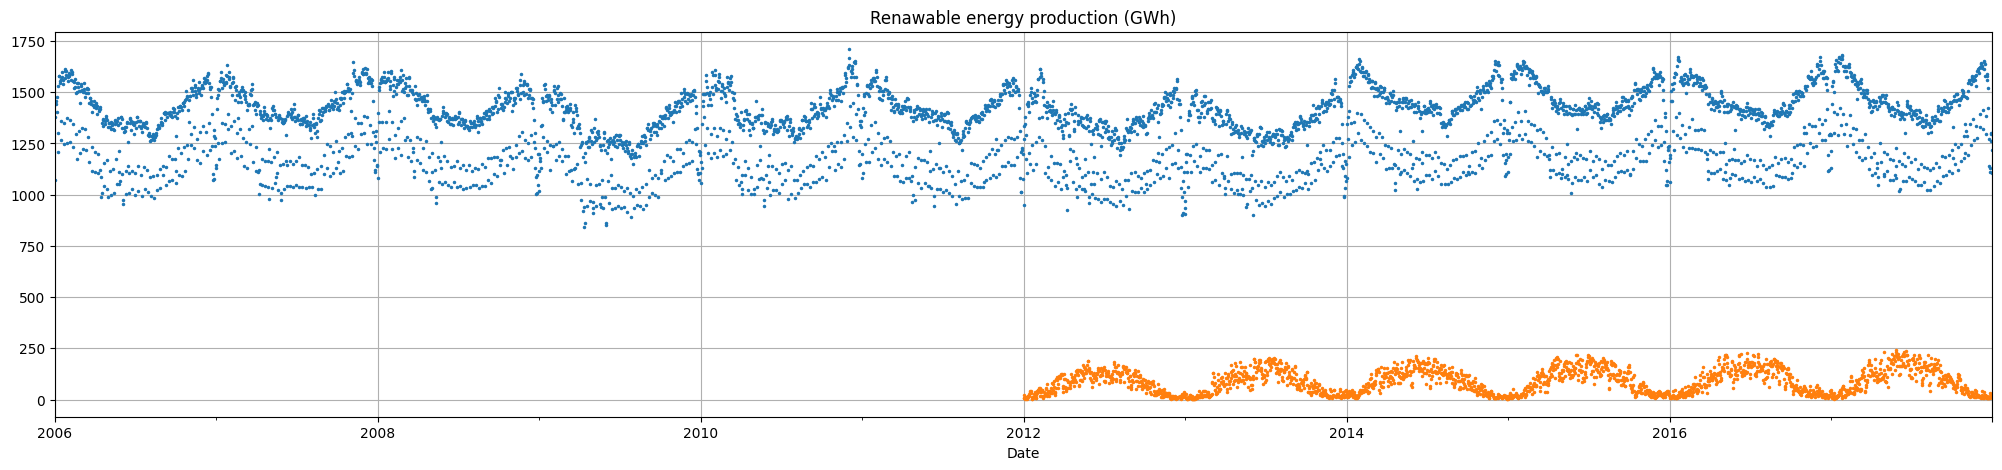

In [3]:
df['Consumption'].plot(figsize=(25, 5),
                        title='Renawable energy production (GWh)',
                        marker='.',
                        markersize=3,
                        linestyle='',
                        grid=True)

df['Solar'].plot(figsize=(25, 5),
                        title='Renawable energy production (GWh)',
                        marker='.',
                        markersize=3,
                        linestyle='',
                        grid=True)

### Exercise 2

Analyse the trend in solar energy production starting from $2012$.

Compare, starting from $2006$, the trends in

* solar energy production
* wind energy production
* total production of renewable energy.

### Exercise 3

Import and plot the time series [`alcohol_sales`](datasets/alcohol_sales.csv).

1. Find the series decomposition.
2. Plot the components and try to describe them
3. Analyse residual distribution and try to find out if they follow a normal, etc.

### Exercise 4

Import and plot the time series [`co2-ppm`]('https://pkgstore.datahub.io/core/co2-ppm-daily/co2-ppm-daily_csv/data/f2f91444294eec9f764430483fafc6be/co2-ppm-daily_csv.csv'). 

1. Try to plot the series and decompose it.
2. Find the distribution of the residual part. Does it follow a Gaussian curve?

### Exercise 5
Forecast and represent the solar energy production of $2017$, by using years from $2012$ to $2016$ as training data. 

You should use at least 2 different models and compare results.

### Exercise 6

Import, plot and analyse the time series of [Italian covid cases](https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv).

1. Try to plot at normal and log scales the new cases, hospitalised and deaths. What can you say?
2. Find the _lag of maximum correlation_ between the series of new cases and deaths to determine how delayed is one curve with respect to the other.
3. Taking a forecast window of 3 weeks, try to forecast the new cases tomorrow. Think of what metric is the most suitable to use.